In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [4]:
mnist = input_data.read_data_sets("official/mnist/dataset.py",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting official/mnist/dataset.py/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting official/mnist/dataset.py/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting official/mnist/dataset.py/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting official/mnist/dataset.py/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [10]:
sample = mnist.train.images[2].reshape(28,28)

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

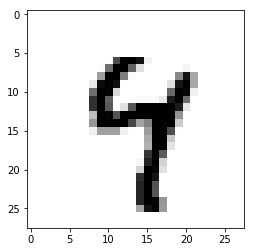

In [13]:
plt.imshow(sample,cmap='Greys')

In [46]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [47]:
n_classes = 10
n_samples = mnist.train.num_examples

In [48]:
n_input = 784

In [49]:
n_hidden_1 = 256
n_hidden_2 = 256

In [50]:
def multilayer_perceptron(x,weights,biases):
    
    #     x: Placeholder for Data input
    #     weights: Dict of weights
    #     biases: Dict of bias values    
    
    
    #     First Hidden Layer with RELU Activation
    #     X*W+B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    #     RELU(X*W+B) = RELU --> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #     Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #     Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer




    

In [51]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))   
}

In [52]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))     
}

In [53]:
x = tf.placeholder('float',[None,n_input])

In [54]:
y = tf.placeholder('float',[None,n_classes])

In [56]:
pred = multilayer_perceptron(x,weights,biases)

In [60]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [61]:
mnist.train.next_batch(10)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [65]:
t = mnist.train.next_batch(1)

In [66]:
Xsamp,ysamp = t

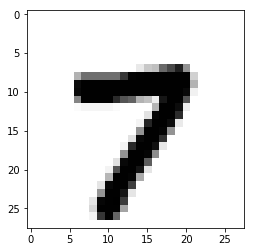

In [69]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [70]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

## Run the Session

In [73]:
sess = tf.InteractiveSession()

In [75]:
init = tf.global_variables_initializer()

In [76]:
sess.run(init)

In [79]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c= sess.run([optimizer, cost],feed_dict={x:batch_x,y:batch_y})

        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))
    
print("Model has completed {} Epochs of training".format(training_epochs))
    

Epoch: 1 cost189.2226
Epoch: 2 cost42.1131
Epoch: 3 cost26.7120
Epoch: 4 cost18.9207
Epoch: 5 cost13.7833
Epoch: 6 cost10.3925
Epoch: 7 cost7.6797
Epoch: 8 cost5.7508
Epoch: 9 cost4.3207
Epoch: 10 cost3.2773
Epoch: 11 cost2.4015
Epoch: 12 cost1.8514
Epoch: 13 cost1.3353
Epoch: 14 cost1.0275
Epoch: 15 cost0.8708
Model has completed 15 Epochs of training


## Model Evaluations

In [80]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [81]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [82]:
correct_predictions = tf.cast(correct_predictions,'float')

In [83]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [84]:
accuracy = tf.reduce_mean(correct_predictions)

In [85]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [86]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [88]:
# mnist.test.images[0]

In [89]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9426